## 6.2 Exploring Relationships

## Contents

### 1. Importing Libraries and Data
### 2. Pick out the suitable variables from the data for exploratory visual analysis
### 3. Create a Correlation Matrix Heatmap (colored)
### 4. Create Scatterplots
### 5. Create a Pair Plot of the entire Data set
### 6. Create a Categrical Plot and interpreat the Results
### 7. Revisit the question generrated in the previous task and write answers to those base on the exploration
### 8. Define Hypothesis

## 1. Importing Libraries and Dataset

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# import path of dataframe
path = r"C:\Users\bhimc\Documents\Career Foundry (Achievement 6)"

In [3]:
path

'C:\\Users\\bhimc\\Documents\\Career Foundry (Achievement 6)'

In [4]:
# Import the Cleaned dataset of World Billionares 
df_world = pd.read_csv(os.path.join(path, 'World Billionares', '02 Data','Prepared Data', 'df_world_billionaires.csv'))

In [5]:
df_world.head()

,Unnamed: 0.1,Unnamed: 0,rank,final_worth,category,person_name,age,country,city,source,...,gdp_country,tertiary_edc_rate,primary_edc_rate,life_expectancy_country,tax_revenue_country,total_tax_rate_country,population_country,latitude_country,longitude_country,birth_data
0,0,0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,Paris,LVMH,...,2.715518e+12,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749,3/5/1949 0:00
1,1,1,2,180000,Automotive,Elon Musk,51,United States,Austin,"Tesla, SpaceX",...,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,6/28/1971 0:00
2,2,2,3,114000,Technology,Jeff Bezos,59,United States,Medina,Amazon,...,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,1/12/1964 0:00
3,3,3,4,107000,Technology,Larry Ellison,78,United States,Lanai,Oracle,...,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,8/17/1944 0:00
4,4,4,5,106000,Finance & Investments,Warren Buffett,92,United States,Omaha,Berkshire Hathaway,...,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,8/30/1930 0:00


In [6]:
df_world.shape

(2640, 35)

In [7]:
df_world.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'rank', 'final_worth', 'category',
       'person_name', 'age', 'country', 'city', 'source', 'industries',
       'country_of_citizenship', 'self_made', 'status', 'gender', 'birth_date',
       'last_name', 'first_name', 'date', 'state', 'birth_year', 'birth_month',
       'birth_day', 'cpi_country', 'cpi_change_country', 'gdp_country',
       'tertiary_edc_rate', 'primary_edc_rate', 'life_expectancy_country',
       'tax_revenue_country', 'total_tax_rate_country', 'population_country',
       'latitude_country', 'longitude_country', 'birth_data'],
      dtype='object')

In [8]:
#dropping the "date, Unnamed:0" columns 
df_world.drop(columns = ['Unnamed: 0'])

,Unnamed: 0.1,rank,final_worth,category,person_name,age,country,city,source,industries,...,gdp_country,tertiary_edc_rate,primary_edc_rate,life_expectancy_country,tax_revenue_country,total_tax_rate_country,population_country,latitude_country,longitude_country,birth_data
0,0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,Paris,LVMH,Fashion & Retail,...,2.715518e+12,65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749,3/5/1949 0:00
1,1,2,180000,Automotive,Elon Musk,51,United States,Austin,"Tesla, SpaceX",Automotive,...,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,6/28/1971 0:00
2,2,3,114000,Technology,Jeff Bezos,59,United States,Medina,Amazon,Technology,...,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,1/12/1964 0:00
3,3,4,107000,Technology,Larry Ellison,78,United States,Lanai,Oracle,Technology,...,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,8/17/1944 0:00
4,4,5,106000,Finance & Investments,Warren Buffett,92,United States,Omaha,Berkshire Hathaway,Finance & Investments,...,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,8/30/1930 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2635,2540,1000,Healthcare,Yu Rong,51,China,Shanghai,Health clinics,Healthcare,...,1.991000e+13,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,12/14/1971 0:00
2636,2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80,United States,Pottsville,Beer,Food & Beverage,...,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,3/10/1943 0:00
2637,2637,2540,1000,Manufacturing,Zhang Gongyun,60,China,Gaomi,Tyre manufacturing machinery,Manufacturing,...,1.991000e+13,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,12/18/1962 0:00
2638,2638,2540,1000,Real Estate,Zhang Guiping & family,71,China,Nanjing,Real estate,Real Estate,...,1.991000e+13,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,8/21/1951 0:00


In [9]:
# Descriptive statistics
df_world.describe()

,Unnamed: 0.1,Unnamed: 0,rank,final_worth,age,birth_year,birth_month,birth_day,cpi_country,cpi_change_country,gdp_country,tertiary_edc_rate,primary_edc_rate,life_expectancy_country,tax_revenue_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2.476000e+03,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2.640000e+03,2640.000000,2640.000000
mean,1319.500000,1319.500000,1289.159091,4623.787879,65.136742,1957.178030,5.747727,12.068182,127.022326,4.262121,1.158287e+13,67.113598,102.785947,78.148826,12.342008,43.772841,4.989014e+08,35.039429,12.450736
std,762.246679,762.246679,739.693726,9834.240939,13.093821,13.089894,3.656530,9.776737,25.654260,3.514987,9.575588e+12,20.598419,4.554418,3.600446,5.232943,11.739913,5.385416e+08,16.475144,84.025394
min,0.000000,0.000000,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,3.154058e+09,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.750000,659.750000,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,1.736426e+12,50.600000,100.200000,77.000000,9.600000,36.600000,6.705989e+07,35.861660,-95.712891
50%,1319.500000,1319.500000,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,1.991000e+13,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1979.250000,1979.250000,1905.000000,4200.000000,74.000000,1966.000000,9.000000,20.000000,125.080000,7.500000,2.142770e+13,88.200000,102.600000,80.900000,12.000000,59.100000,1.366418e+09,37.090240,104.195397
max,2639.000000,2639.000000,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,2.142770e+13,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [10]:
df_world.dtypes

Unnamed: 0.1                 int64
Unnamed: 0                   int64
rank                         int64
final_worth                  int64
category                    object
person_name                 object
age                          int64
country                     object
city                        object
source                      object
industries                  object
country_of_citizenship      object
self_made                     bool
status                      object
gender                      object
birth_date                  object
last_name                   object
first_name                  object
date                        object
state                       object
birth_year                   int64
birth_month                  int64
birth_day                    int64
cpi_country                float64
cpi_change_country         float64
gdp_country                float64
tertiary_edc_rate          float64
primary_edc_rate           float64
life_expectancy_coun

## 2. Pick out the suitable variables from the data for exploratory visual analysis

In [12]:
df_world_sub = df_world[['rank','final_worth', 'gdp_country', 'age', 'cpi_change_country', 'cpi_country', 'tertiary_edc_rate', 'primary_edc_rate', 'life_expectancy_country','tax_revenue_country', 'total_tax_rate_country', 'population_country']]

In [13]:
df_world_sub.head()

,rank,final_worth,gdp_country,age,cpi_change_country,cpi_country,tertiary_edc_rate,primary_edc_rate,life_expectancy_country,tax_revenue_country,total_tax_rate_country,population_country
0,1,211000,2.715518e+12,74,1.1,110.05,65.6,102.5,82.5,24.2,60.7,67059887.0
1,2,180000,2.142770e+13,51,7.5,117.24,88.2,101.8,78.5,9.6,36.6,328239523.0
2,3,114000,2.142770e+13,59,7.5,117.24,88.2,101.8,78.5,9.6,36.6,328239523.0
3,4,107000,2.142770e+13,78,7.5,117.24,88.2,101.8,78.5,9.6,36.6,328239523.0
4,5,106000,2.142770e+13,92,7.5,117.24,88.2,101.8,78.5,9.6,36.6,328239523.0


## 3. Create a Correlation Matrix Heatmap (colored)

In [14]:
# Creating correlation table between variables
df_world_sub.corr()

,rank,final_worth,gdp_country,age,cpi_change_country,cpi_country,tertiary_edc_rate,primary_edc_rate,life_expectancy_country,tax_revenue_country,total_tax_rate_country,population_country
rank,1.000000,-0.448930,-0.052705,-0.141129,-0.068781,0.070048,-0.122500,0.004531,-0.039509,0.017674,0.117906,0.113635
final_worth,-0.448930,1.000000,0.037589,0.067009,0.038218,-0.039356,0.066801,-0.007098,0.020873,-0.004866,-0.034300,-0.050164
gdp_country,-0.052705,0.037589,1.000000,-0.068089,0.383566,-0.289232,0.299769,-0.363725,-0.057447,-0.582963,0.151213,0.451567
age,-0.141129,0.067009,-0.068089,1.000000,0.098407,-0.008028,0.057489,0.059502,0.021042,-0.002971,-0.146046,-0.163279
cpi_change_country,-0.068781,0.038218,0.383566,0.098407,1.000000,0.443006,0.168948,0.059025,-0.393871,-0.297405,0.010002,0.076796
cpi_country,0.070048,-0.039356,-0.289232,-0.008028,0.443006,1.000000,-0.450233,0.283397,-0.745331,-0.021620,0.250611,0.226583
tertiary_edc_rate,-0.122500,0.066801,0.299769,0.057489,0.168948,-0.450233,1.000000,-0.296715,0.523111,0.030995,-0.391930,-0.537378
primary_edc_rate,0.004531,-0.007098,-0.363725,0.059502,0.059025,0.283397,-0.296715,1.000000,-0.307639,0.136251,0.101412,0.015691
life_expectancy_country,-0.039509,0.020873,-0.057447,0.021042,-0.393871,-0.745331,0.523111,-0.307639,1.000000,0.349409,-0.269445,-0.519934
tax_revenue_country,0.017674,-0.004866,-0.582963,-0.002971,-0.297405,-0.021620,0.030995,0.136251,0.349409,1.000000,-0.039802,-0.409019


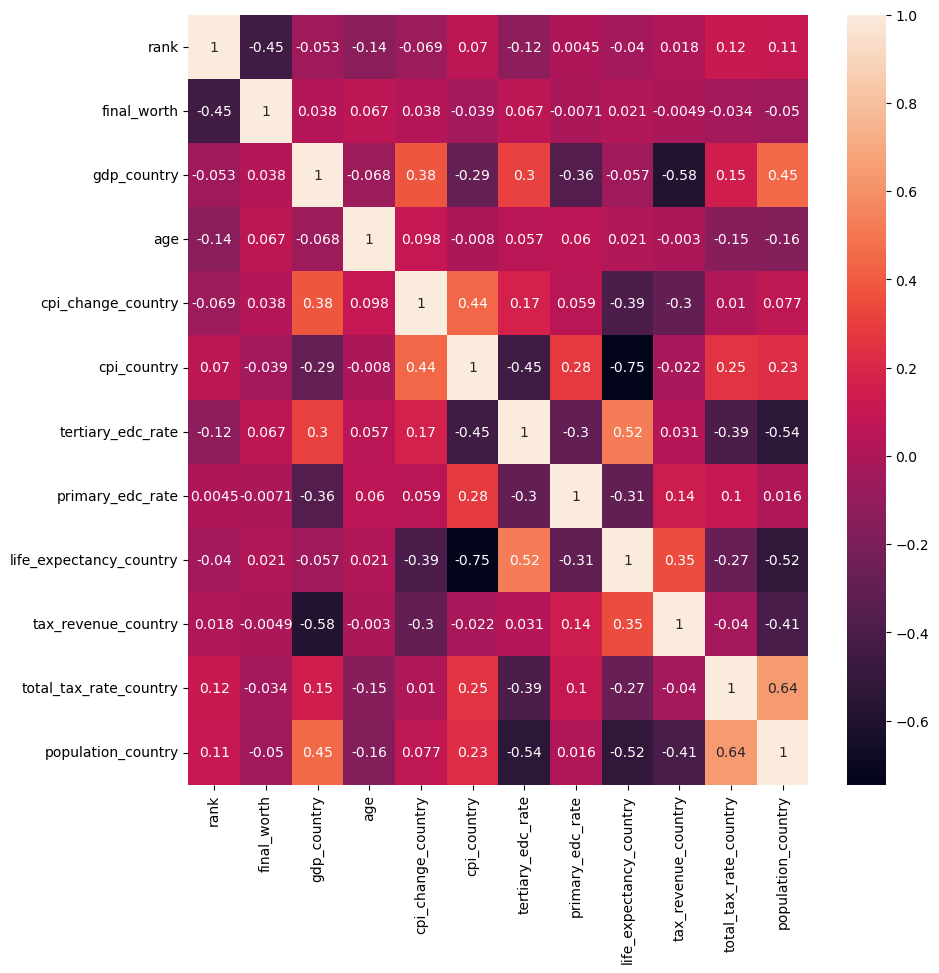

In [15]:
# Creating subplot using matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating matrix heatmap using seaborn
corr = sns.heatmap(df_world_sub.corr(), annot = True, ax = ax)

## 4. Create Scatterplots

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


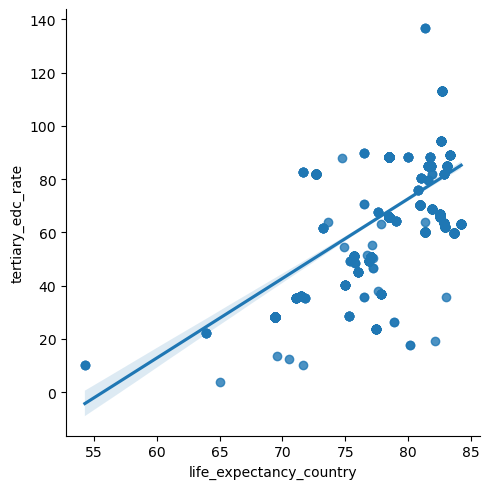

In [17]:
# Scatterplot of most correlated variables
# tertiary_edc_rate and life_expected_country scatterplot
sns.lmplot(x = 'life_expectancy_country', y = 'tertiary_edc_rate', data = df_world)

#### Tertiary education rate in a country is strongly correlated with its life expectancy. However, several points are not near the regression line, indicating a great deal of variability. And, there is one clear outlier at age 81, with tertiary-edu_rate near 140.

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


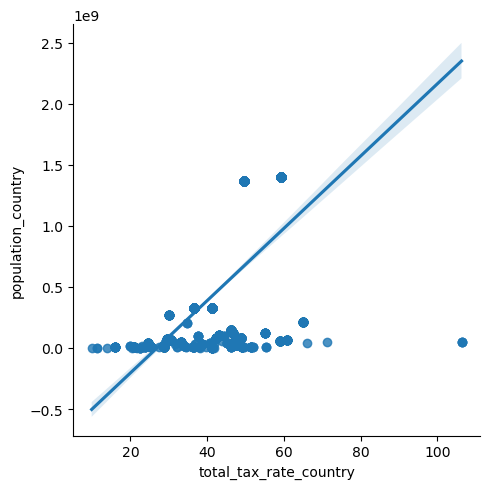

In [18]:
#  Total_tax_rate_country and population_country scatterplot
sns.lmplot(x = 'total_tax_rate_country', y = 'population_country', data = df_world)

### There is a strong correlation between the population country with total tax rate country. however, Three outliers are likely to impact the regression line.

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


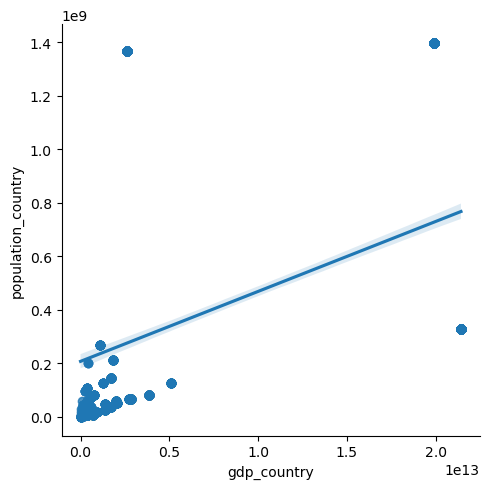

In [20]:
# Create a scatterplot for the cgdp_country and population_country
sns.lmplot(x = 'gdp_country', y = 'population_country', data = df_world)

### According to the coefficient of correlation, there is an important connection between a country's population size and its GDP. However, none of the spots are especially close to the line. Three outliers are likely to impact the regression line. The great majority of countries have low populations and GDP. The connection might be significantly stronger if the three data points that are spread out were removed.

## 5. Create a Pair Plot of the entire Data set

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

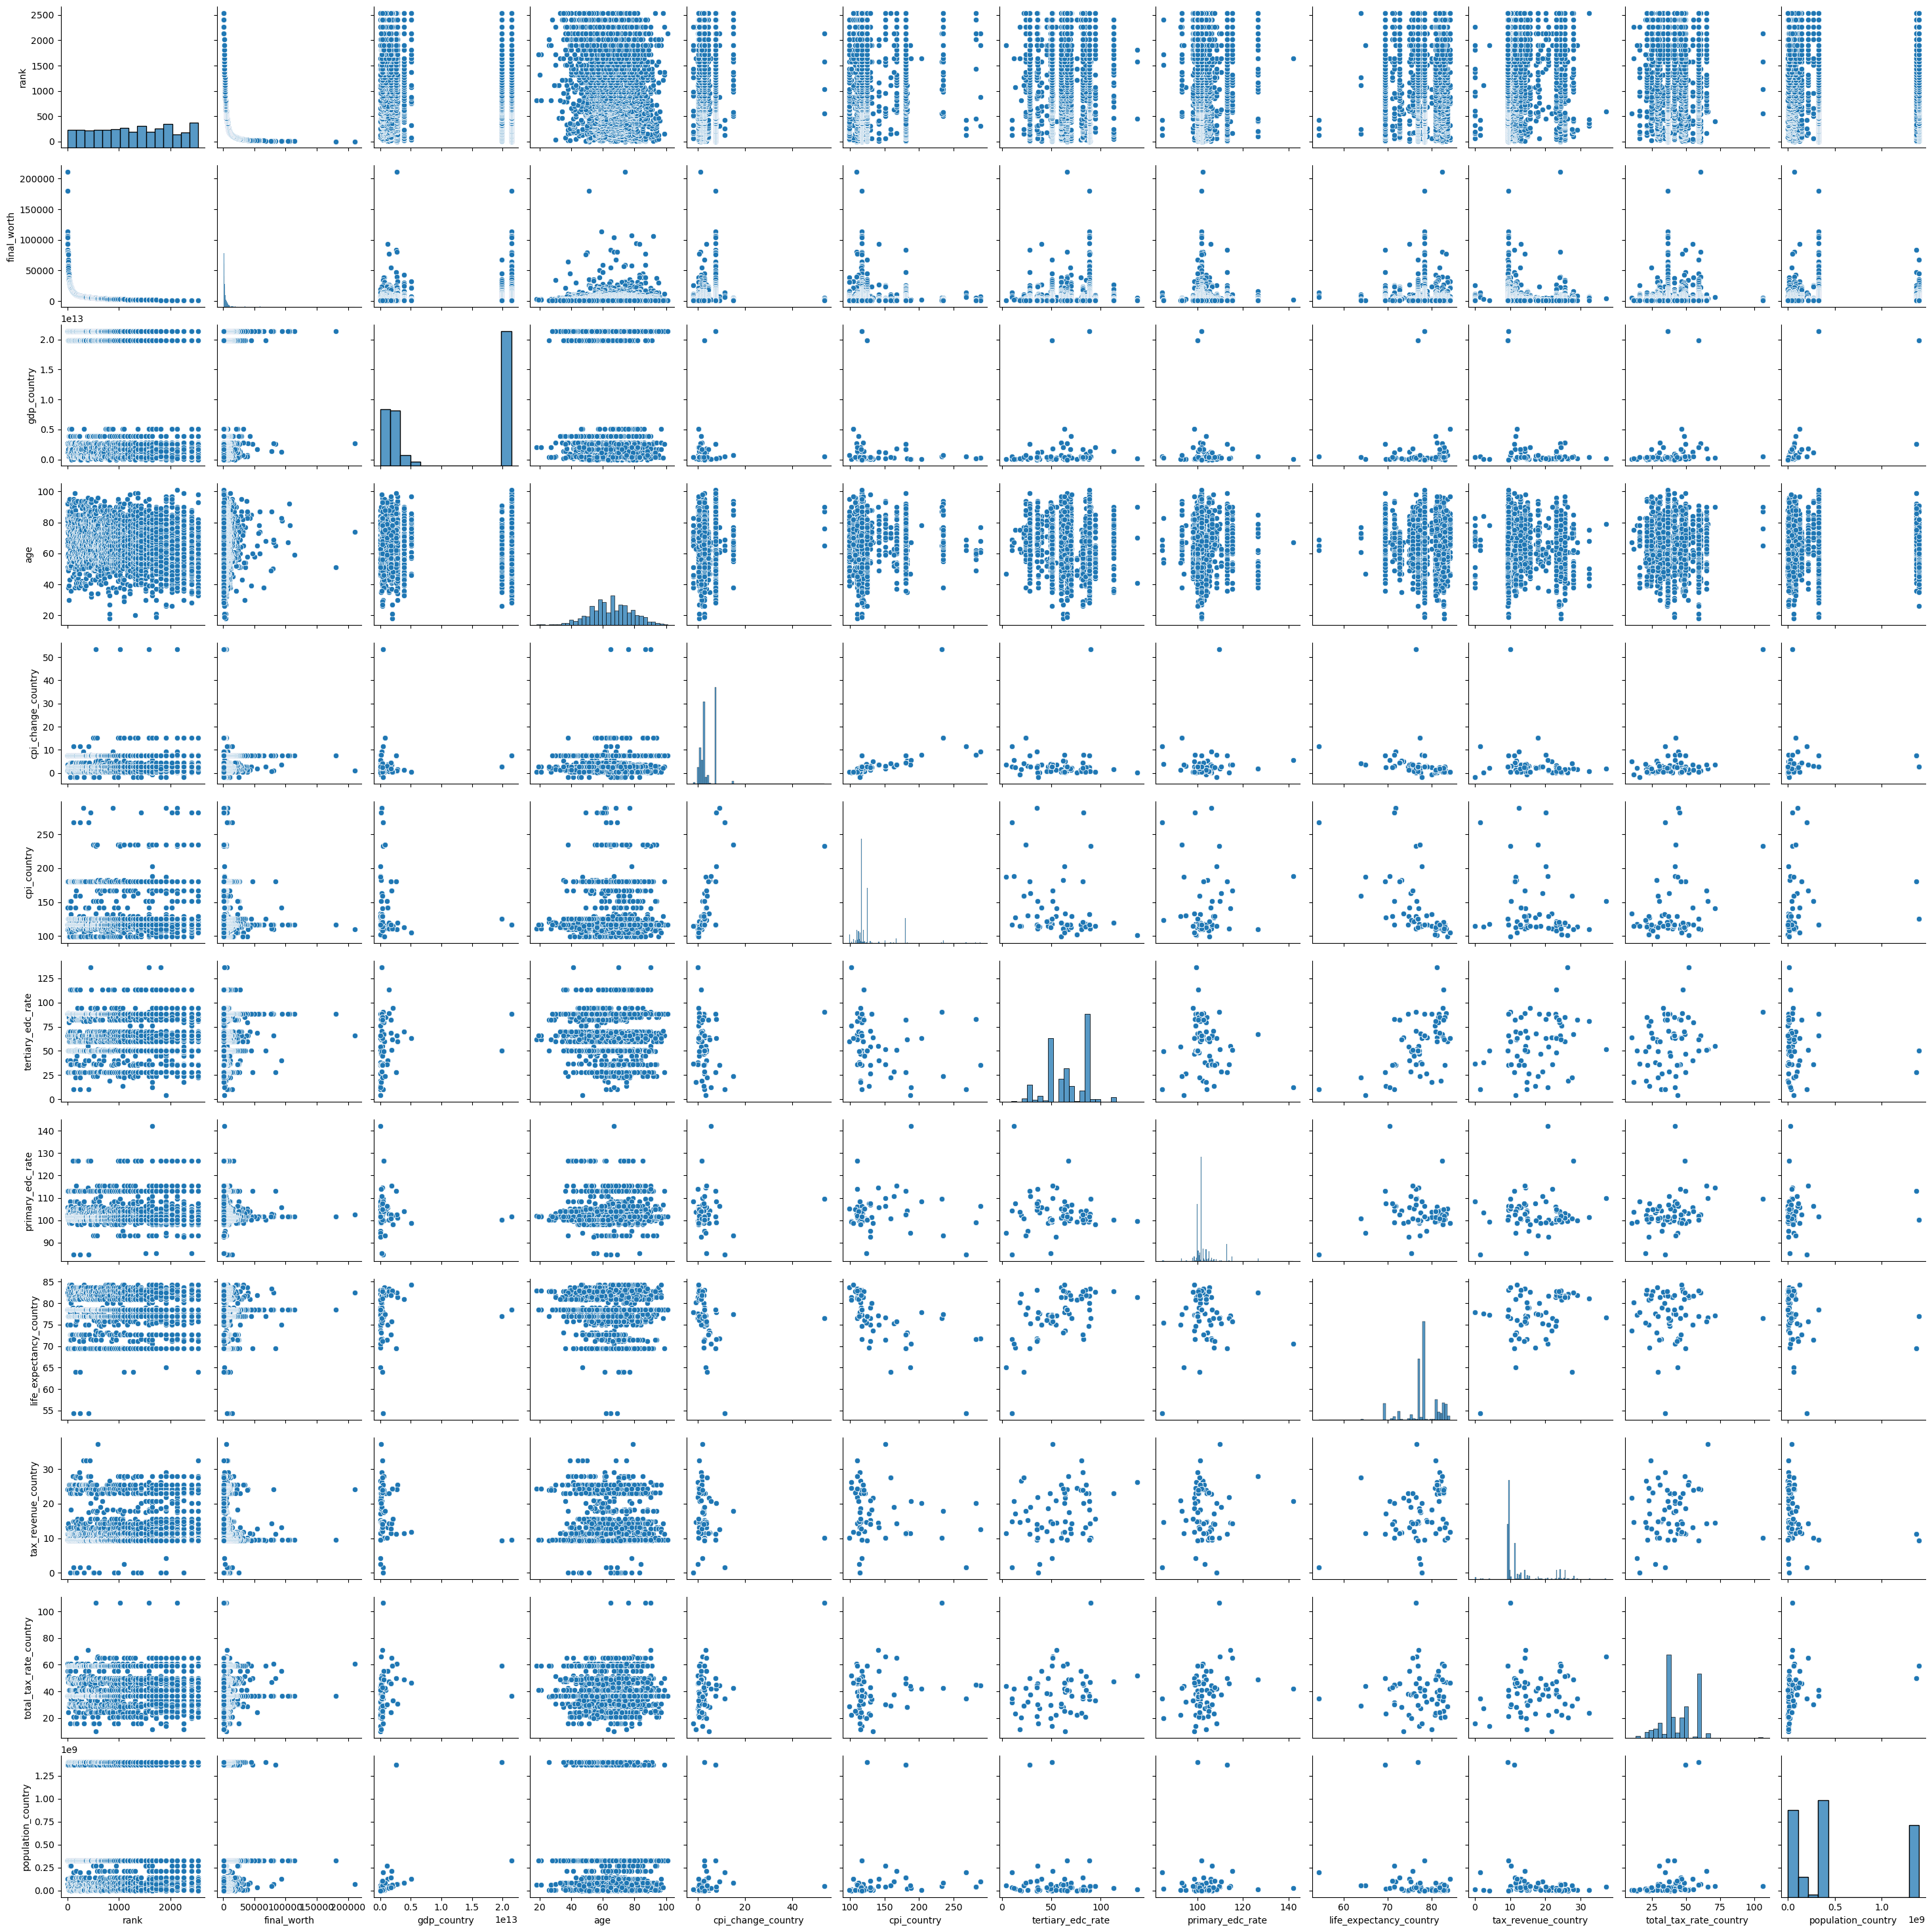

In [21]:
# Creating a pairplot
pair_plot = sns.pairplot(df_world_sub)

In [23]:
# Creating smaller subsection to see just strongest variables
df_world_sub_strong = df_world_sub[['life_expectancy_country', 'tertiary_edc_rate', 'total_tax_rate_country', 'population_country', 'gdp_country',]]

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

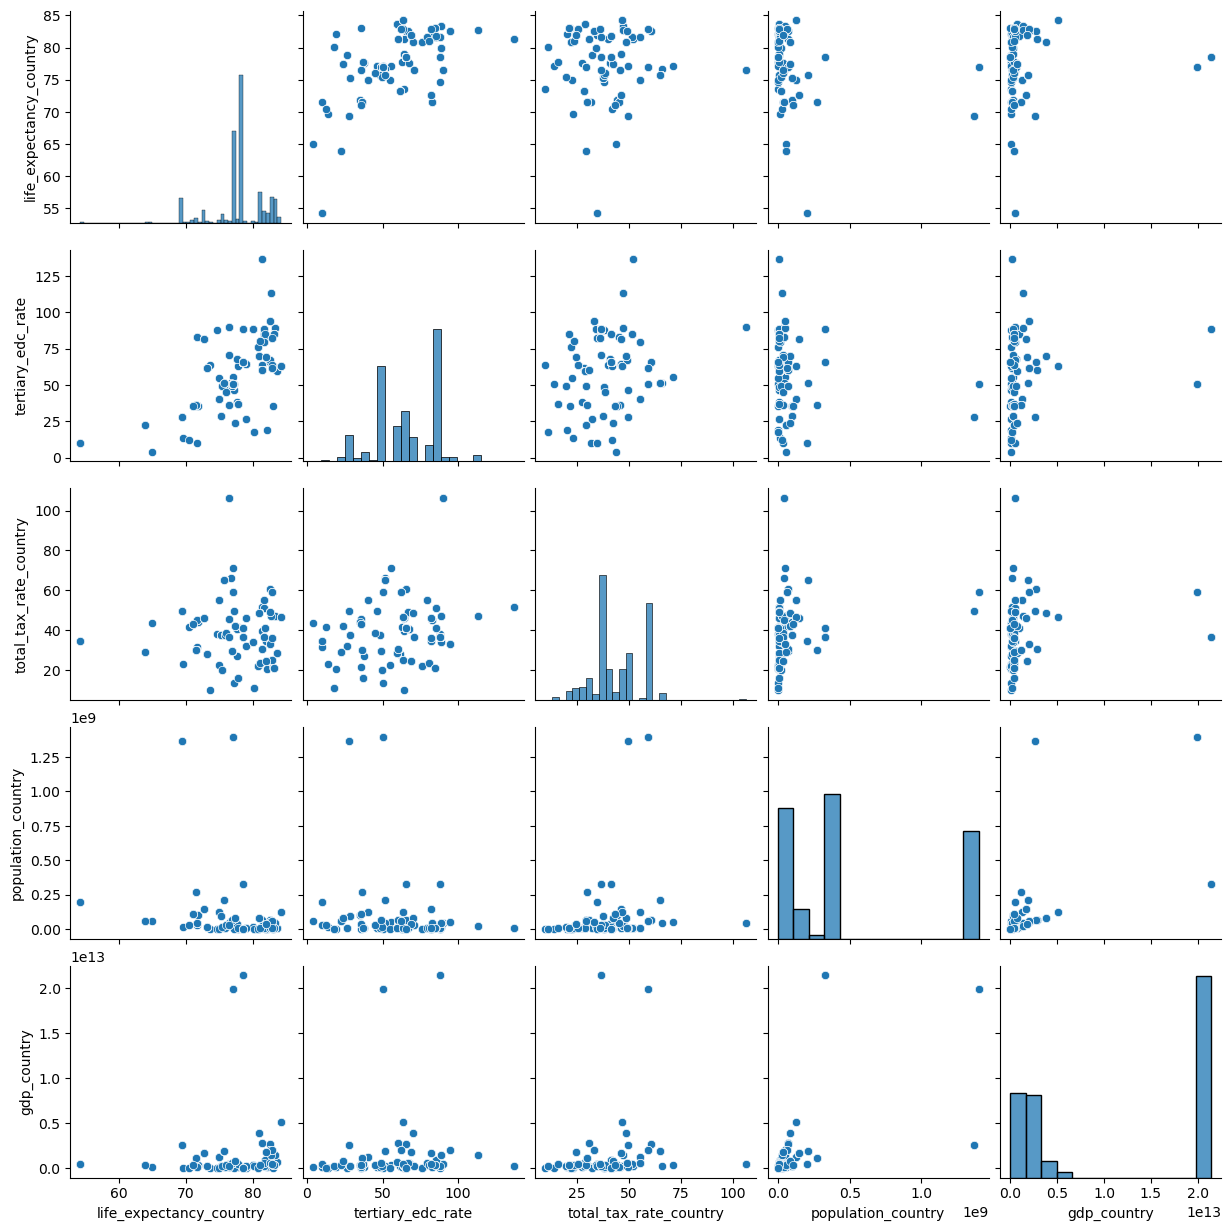

In [24]:
pair_plot_strong = sns.pairplot(df_world_sub_strong)

### Question 5 Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why

#### Overall a lot of the variables have a strong positive corrleation with each other.

## 6. Create a Categrical Plot and interpreat the Results

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

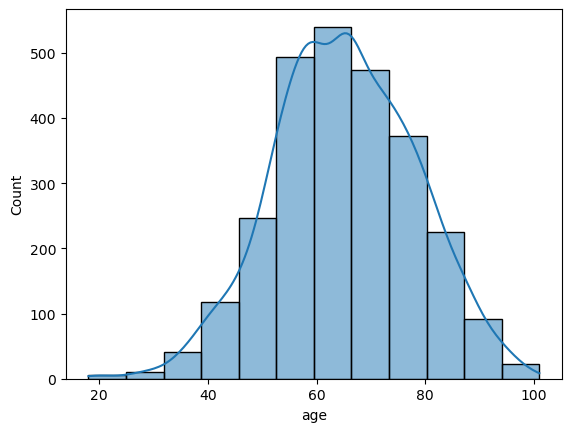

In [25]:
# Creating a histogram to see distribution
sns.histplot(df_world['age'], bins = 12, kde = True)

In [32]:
# Creating Time_category for categorical plot
df_world.loc[df_world['age']<40, 'age_category'] = 'young_age'

In [33]:
df_world.loc[(df_world['age'] >= 40) & (df_world['age'] < 65), 'age_category'] = 'middle_age'

In [34]:
df_world.loc[df_world['age'] >= 65, 'age_category'] = 'senior_citizen'

In [35]:
df_world['age_category'].value_counts(dropna = False)

age_category
senior_citizen    1393
middle_age        1180
young_age           67
Name: count, dtype: int64

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


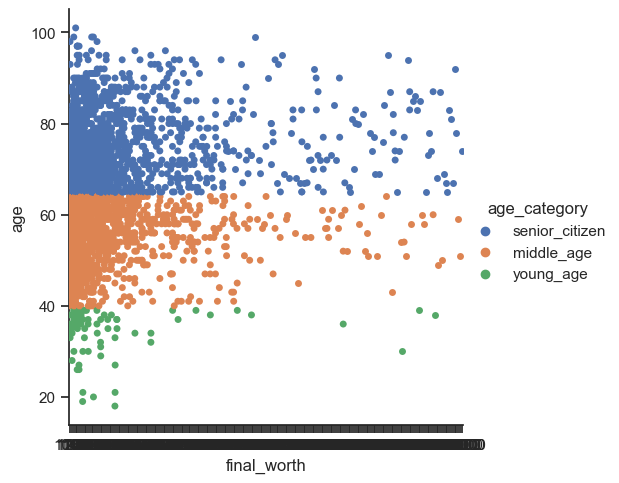

In [36]:
# Creating categorical plot in seaborn using the age categories:
sns.set(style="ticks")
cat_plot_sold = sns.catplot(x='final_worth', y='age', hue='age_category', data=df_world)

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


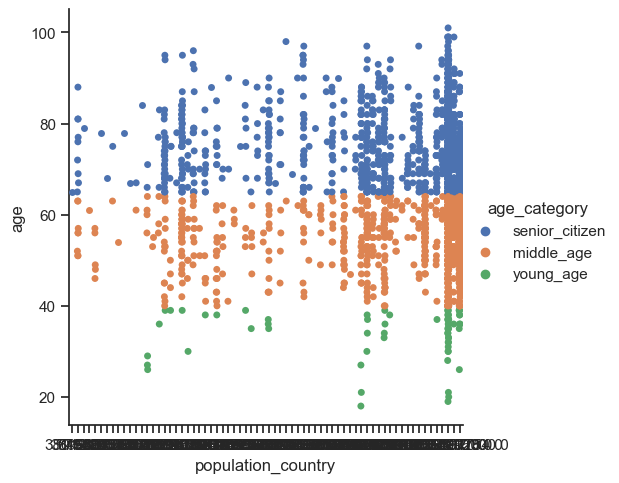

In [37]:
# Creating categorical plot in seaborn using the age categories:
sns.set(style="ticks")
cat_plot_sold = sns.catplot(x='population_country', y='age', hue='age_category', data=df_world)

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


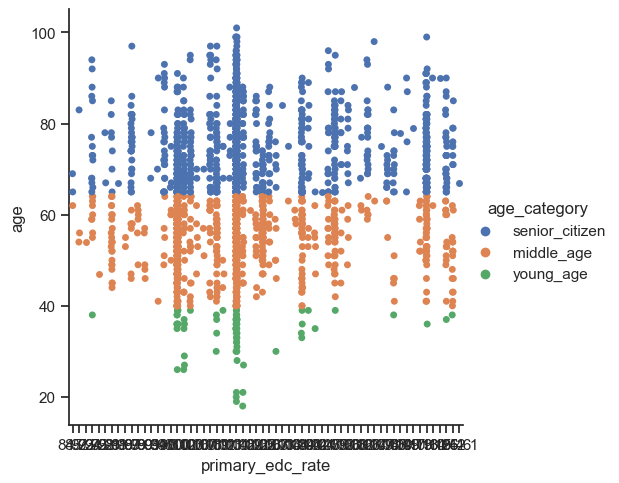

In [52]:
# Creating categorical plot in seaborn using the age categories:
sns.set(style="ticks")
cat_plot_sold = sns.catplot(x='primary_edc_rate', y='age', hue='age_category', data=df_world)

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_tax_rate_country', ylabel='Count'>

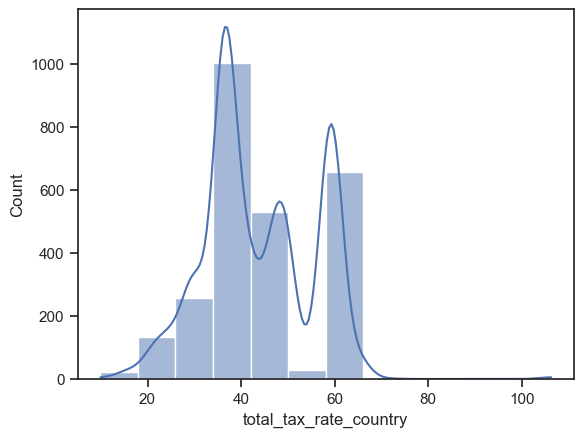

In [39]:
# Creating a histogram to see distribution
sns.histplot(df_world['total_tax_rate_country'], bins = 12, kde = True)

In [40]:
# Creating Time_category for categorical plot
df_world.loc[df_world['total_tax_rate_country']<35, 'tax_category'] = 'small_tax_rate'

In [41]:
df_world.loc[(df_world['total_tax_rate_country'] >= 35) & (df_world['total_tax_rate_country'] < 60), 'tax_category'] = 'middle_tax_rate'

In [43]:
df_world.loc[df_world['total_tax_rate_country'] >= 60, 'tax_category'] = 'high_tax_rate'

In [44]:
df_world['tax_category'].value_counts(dropna = False)

tax_category
middle_tax_rate    2132
small_tax_rate      423
high_tax_rate        85
Name: count, dtype: int64

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


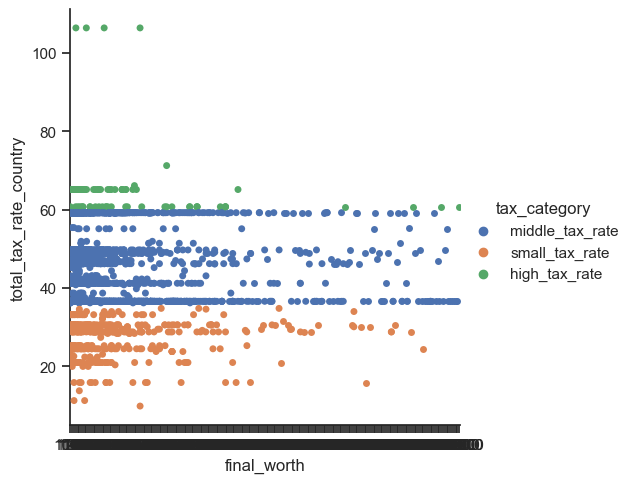

In [45]:
# Creating categorical plot in seaborn using the tax categories:
sns.set(style="ticks")
cat_plot_sold = sns.catplot(x='final_worth', y='total_tax_rate_country', hue='tax_category', data=df_world)

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


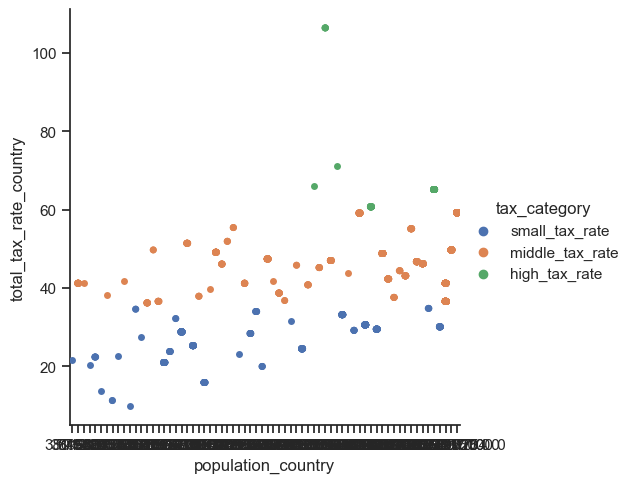

In [46]:
# Creating categorical plot in seaborn using the age categories:
sns.set(style="ticks")
cat_plot_sold = sns.catplot(x='population_country', y='total_tax_rate_country', hue='tax_category', data=df_world)

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


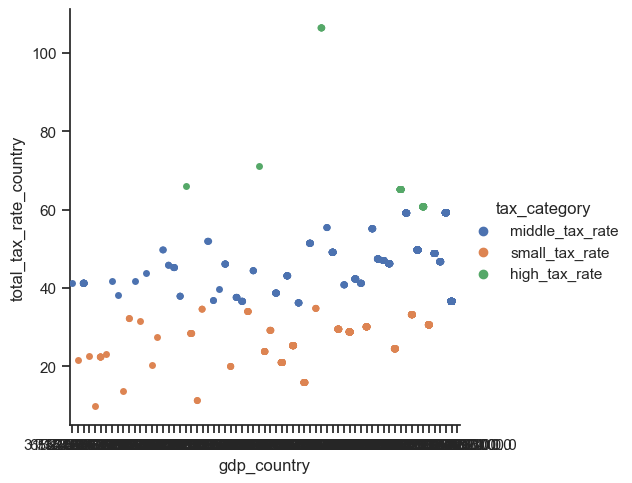

In [47]:
# Creating categorical plot in seaborn using the age categories:
sns.set(style="ticks")
cat_plot_sold = sns.catplot(x='gdp_country', y='total_tax_rate_country', hue='tax_category', data=df_world)

C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhimc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


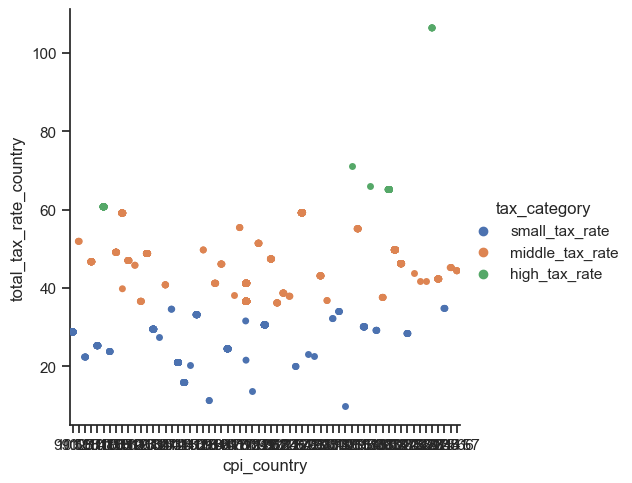

In [48]:
# Creating categorical plot in seaborn using the age categories:
sns.set(style="ticks")
cat_plot_sold = sns.catplot(x='cpi_country', y='total_tax_rate_country', hue='tax_category', data=df_world)

In [50]:
#Exporting df_listings (non-subset, with category flags applied)
df_world.to_csv(os.path.join(path, 'World Billionares', '02 Data','Prepared Data', 'df_world_flag.csv'))